### 목표
 - 버섯의 특징을 활용해 독성/식용 버섯을 분류하는 실습을 해보자
 - Decision Tree 분류 모델을 학습하고 시각화 & 과대적합 제어
 - 모델 자체적으로 특성 중요도를 선택한 것을 확인해보자

In [1]:
# 머신러닝에 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 머신러닝 패키지
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # 트리 분류 모델

#### 데이터 불러오기

In [2]:
data = pd.read_csv('./data/mushroom.csv')
data.head()
# poisonous : 독성/식용인지 구분하는 컬럼 -> 답데이터
# p - 독버섯, e - 식용버섯
# poisonous를 제외한 나머지 컬럼 -> 문제 데이터

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# 데이터 정보 : 컬럼 이름, 행열 크기, 결측치여부, 데이터타입 등 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
# df 모든 컬럼 출력하기
pd.set_option('display.max_columns', None) # 모든 컬럼 출력
data.head(2)
# 데이터 타입을 확인해보니 모두 문자열
# 머신러닝 모델은 수치화된 데이터만 학습 가능
# 문자 -> 수치  : encoding (데이터 타입을 우리가 필요한 타입으로 변환시키는 것)

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g


#### 데이터 전처리 및 탐색
- 문제(특성)와 답(라벨) 분리

In [5]:
data.columns

Index(['poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
# 컬럼 인덱싱
# 답 : poisonous, 문제 : 답을 제외한 모든 컬럼
X = data.drop('poisonous', axis = 1) # drop은 행을 삭제 -> 열을 삭제하려면 axis = 1
# X = data.iloc[:, 1:]
# X = data.loc[:, 'cap-shape':]
y = data['poisonous']

# 크기 확인
print('문제 크기 :', X.shape)
print('답 크기 :', y.shape)

문제 크기 : (8124, 22)
답 크기 : (8124,)


In [7]:
# 문제 데이터 기술통계 확인하기
# 최소, 최대, 중앙, 최빈, 평균 ...
# 문자형태(범주형) -> 최빈값 -> 어떤 알파벳이 가장 많이 나온 알파벳인지
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
# 답데이터의 개수 세어보기 (독성 버섯, 식용 버섯은 몇 개씩 들어있을까?)
y.value_counts()

poisonous
e    4208
p    3916
Name: count, dtype: int64

- 인코딩(encoding) : 범주(문자) -> 수치
    - 레이블 인코딩(label encoding) : 값의 크고 작음에 의미가 있는 인코딩
    - 원핫 인코딩(one-hot encoding) : 값의 크고 작음에 의미가 없는 인코딩

In [9]:
# 버섯데이터의 모든 컬럼을 원핫인코딩
# pd.get_dummies(대상) : 대상을 원핫인코딩 해줌
# 예시 cap-shape 컬럼 1개 적용
X_temp = pd.get_dummies(X.iloc[:,:1])
X_temp

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x
0,False,False,False,False,False,True
1,False,False,False,False,False,True
2,True,False,False,False,False,False
3,False,False,False,False,False,True
4,False,False,False,False,False,True
...,...,...,...,...,...,...
8119,False,False,False,True,False,False
8120,False,False,False,False,False,True
8121,False,False,True,False,False,False
8122,False,False,False,True,False,False


In [10]:
# X에 있는 모든 컬럼 원핫인코딩
X_oh = pd.get_dummies(X)
X_oh.head()
# 크기 확인
X_oh.shape   # 컬럼의 개수가 굉장히 많이 늘어났다 (∵원핫인코딩해서)

(8124, 117)

In [11]:
# 훈련셋, 테스트셋 분리
# 분리비율 7:3
X_train,X_test,y_train,y_test = train_test_split(X_oh,y,
                                                test_size = 0.3,
                                                random_state = 3)
# 크기 확인
print('훈련 문제 :', X_train.shape)
print('훈련 답 :', y_train.shape)
print('테스트 문제 :', X_test.shape)
print('테스트 답 :', y_test.shape)
# sklearn 안에 있는 모델들은 답데이터가 문자여도 예측 가능

훈련 문제 : (5686, 117)
훈련 답 : (5686,)
테스트 문제 : (2438, 117)
테스트 답 : (2438,)


In [12]:
np.unique(y_train, return_counts = True)

(array(['e', 'p'], dtype=object), array([2929, 2757], dtype=int64))

#### 모델링
 - tree 모델 객체 생성
 - 학습

In [13]:
tree_model = DecisionTreeClassifier()  # 기본값 그대로 사용
# -> 트리 모델이 가지를 뻗을 수 있을만큼 최대로 뻗어서 모델링
# 모델의 깊이가 깊어진다 
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

- 모델의 일반화 성능 확인 : 교차검증
    - 개념 : 일반화 성능 측정 방법 -> 모든 데이터에 대해서 모델이 얼마나 잘 맞추는지 평가, 한번 나누는 것보다는 더 안정적인 평가 방법
    - 방법론 : 훈련세트를 기준으로 훈련세트와 검증용 세트로 여러겹 나눠서 평가 (새로운 test 데이터를 train 데이터 내부에서 여러 개 만들어서 평가)
    - 모델을 정의하고 학습하기 전에 정확도가 얼마 정도일지 예측 가능

In [14]:
# cross_val_score() : 교차검증을 위한 도구
from sklearn.model_selection import cross_val_score

In [15]:
# cross_val_score(모델명, 훈련문제, 훈련답, cv=검증횟수(검증 데이터를 분리하는 횟수))
result1 = cross_val_score(tree_model, X_train, y_train, cv = 5)
result1
# 해당 모델은 버섯 분류에 있어서 과대적합을 제어하지 않아도 
# 성능이 굉장히 좋은 상태 -> 과대적합 제어할 필요 X 

array([1.        , 1.        , 1.        , 1.        , 0.99912049])

In [16]:
# X_test 성능 확인
# predict > 실제값을 비교
# accuracy_score(실제값, 예측값) --> 예측값이 무조건 존재해야함
# 모델이 자체적으로 가지고 있는 score() --> accuracy
test_acc = tree_model.score(X_test, y_test)
test_acc  # 100% 맞췄다!
# 버섯 특징데이터가 버섯을 잘 분류하기에 좋은 상태의 데이터다

1.0

#### 모델이 선택한 중요한 특성 확인
- 특성 선택
- tree 계열의 모델은 특성 중요도를 출력하는 키워드가 있음
- 모델.feature_importances_

In [17]:
X_oh.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

In [18]:
fi = tree_model.feature_importances_
fi  # 과학적 표기법 -> 실수값
# df으로 변환

fi_df = pd.DataFrame(fi, index = X_oh.columns, 
                    columns = ['import'])   # 117개 특성 중요도를 수치값
fi_df

# 특성 중요도(import) 내림차순으로 정렬해보기(top5만 보기)
fi_df['import'].sort_values(ascending = False).head()

# 냄새에 대한 데이터가 61점 정도로, 독성/식용 버섯을 구분하는 
# 가장 중요한 질문이었다.

odor_n                        0.616063
stalk-root_c                  0.175846
stalk-surface-below-ring_y    0.105295
spore-print-color_r           0.032861
odor_l                        0.023063
Name: import, dtype: float64

#### tree 모델 시각화
- 시각화 패키지 설치

In [19]:
# graphviz 먼저 다운받은 후
!pip install graphviz

In [21]:
from sklearn.tree import export_graphviz
import graphviz

In [22]:
export_graphviz(tree_model, out_file = './data/tree.dot',
               class_names = ['독', '식'],
               feature_names = X_oh.columns,
               impurity = False,  # 지니불순도와 비슷한 개념
               filled = True      # 해당 노드의 클래스에 색상 지정
               )

In [26]:
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

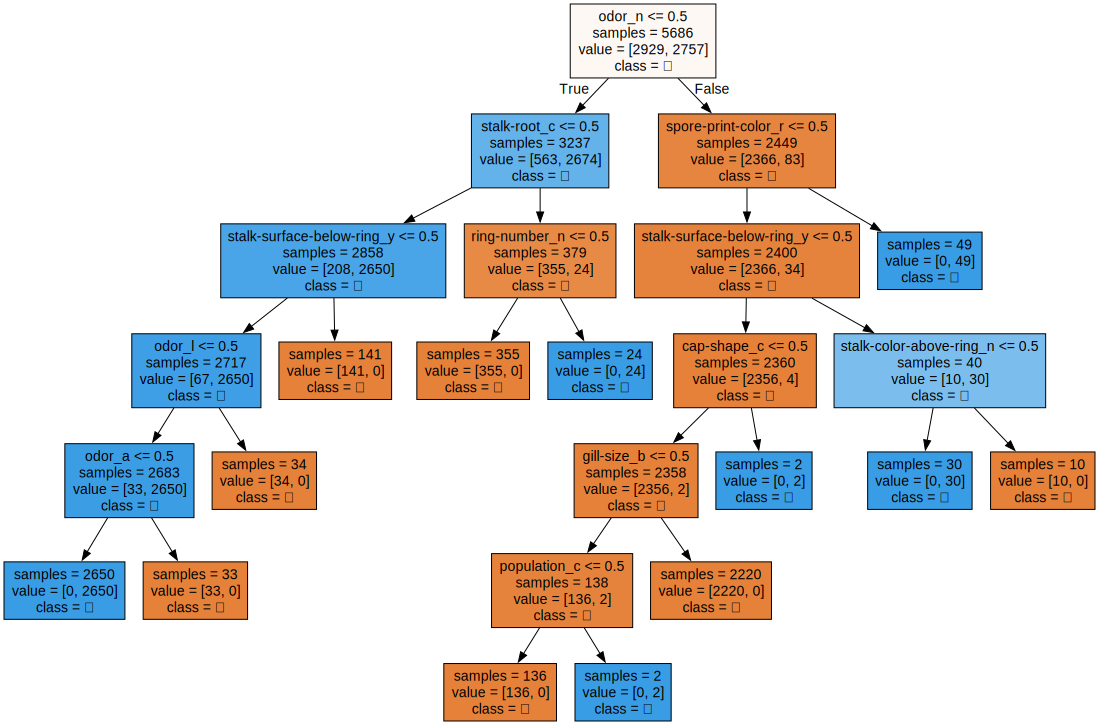

In [27]:
with open('./data/tree.dot', encoding = 'UTF8') as f:  # 파일 읽어오기
    dot_graph = f.read()
dot_graph
# 그래프 그리기
display(graphviz.Source(dot_graph))  # depth가 6

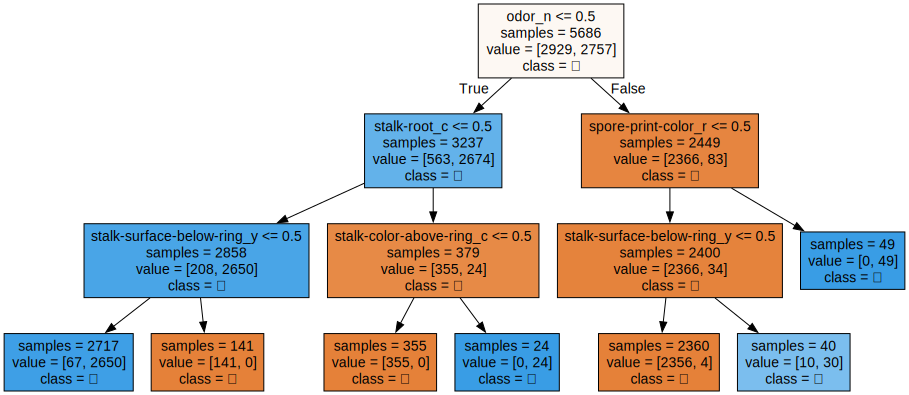

In [28]:
# tree 모델 객체 새로 생성, 깊이 3
tree_model2 = DecisionTreeClassifier(max_depth = 3) 
tree_model2.fit(X_train,y_train)

export_graphviz(tree_model2, out_file = './data/tree2.dot',
               class_names = ['독', '식'],
               feature_names = X_oh.columns,
               impurity = False,  # 지니불순도와 비슷한 개념
               filled = True      # 해당 노드의 클래스에 색상 지정
               )

with open('./data/tree2.dot', encoding = 'UTF8') as f:  # 파일 읽어오기
    dot_graph = f.read()
dot_graph
# 그래프 그리기
display(graphviz.Source(dot_graph))